In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pylab

In [65]:
R0 = 20

R = 300

n = 1000 # no. of r-intevals 
m = 1000 # no. of theta-intevals

r = R * np.arange(n+1)/n
t = 2*np.pi * np.arange(m+1)/m

dr = R/n
dt = 2*np.pi/m

epsilon = 0.0001
eta = 1

def G(x):    
    return (10 - x)

time = 500

In [66]:
def tg_pred(R0):
    #we make a matrix of the corresponding size
    u = np.zeros((n+1, m+1))

    # Filling the matrix with the symmetric initial data 
    #it's worth noticing though that the results are the same with any initial data filled here
    for k in range(int(R0/R*n)):
        u[k,:] =  eta/R0    
        
    #Boundary Condition
    u[int(R0/R*n), :] = 0 #eta/R0

    #Updating u using a finite method scheme

    v = u #saving the old values

    # Performing the first update of values
    for i in range(1,int(R0/R*n))[::-1]:
        for j in range(m):
            u[i,j] = (dr**2 * dt**2 * r[i] * G(v[i,j]) + (dt**2 * r[i]**2 + dt**2 * r[i] * dr) * u[i+1, j] +  \
            r[i]**2 * dt**2 * u[i-1,j] + dr**2 * (u[i, j+1] + u[i, j-1]) ) / (2*r[i]**2 * dt**2 + r[i] * dt**2 + \
            2 * dr**2 )


    #Continuing the update until the change is negligible
    while( np.max(abs(v-u)) > epsilon ):
        v = u
        for i in range(1,int(R0/R*n))[::-1]:
             for j in range(m):
                u[i,j] = (dr**2 * dt**2 * r[i] * G(r[i]) + (dt**2 * r[i]**2 + dt**2 * r[i] * dr) * u[i+1, j] +  \
                r[i]**2 * dt**2 * u[i-1,j] + dr**2 * (u[i, j+1] + u[i, j-1]) ) / (2*r[i]**2 * dt**2 + r[i] * dt**2 + \
                2 * dr**2 )
        #updating the center value with using neighbouring values 
        u[0,:] = (u[1,0] + u[1,int(m/4)] + [1, int(m/2)] + [1,int(3*m/4)])/4 
    return u

def plot_3d (u):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create the mesh in polar coordinates and compute corresponding Z.
    RR, TT = np.meshgrid(r, t)

    # Express the mesh in the cartesian system.
    X, Y = RR*np.cos(TT), RR*np.sin(TT)

    ax.plot_surface(X, Y, u.transpose(), cmap=plt.cm.YlGnBu_r)

def plot_2d_map (u):
    
    # Create the mesh in polar coordinates and compute corresponding Z.
    RR, TT = np.meshgrid(r, t)
    # Express the mesh in the cartesian system.
    X, Y = RR*np.cos(TT), RR*np.sin(TT)

    pylab.pcolor(X,Y, u.transpose())

    # and a color bar to show the correspondence between function value and color
    pylab.colorbar()

    pylab.show()
    
def update (R0,u):
    g = -(u[int(R0/R*n), 0] - u[int(R0/R*n)- 1, 0])/ dr
    print(g)
    return(R0 + time * g)

In [67]:
u = tg_pred(R0)

R1 = update(R0, u)

u1 = tg_pred(R1)

R2 = update(R1, u1)

u2 = tg_pred(R2)

R3 = update(R2, u2)

u3 = tg_pred(R3)

0.1650901943980727
0.03110015551002659
0.02695251295471636


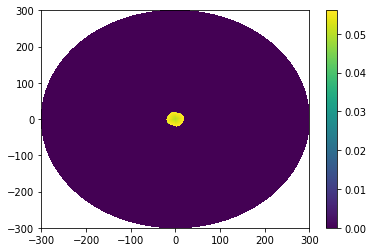

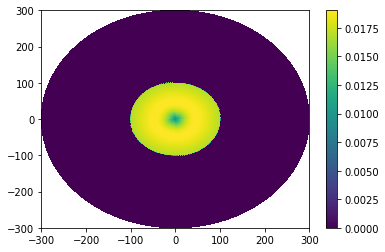

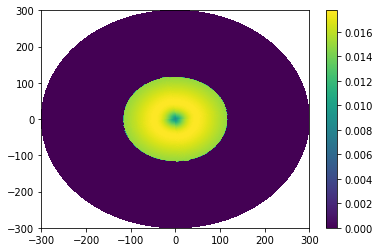

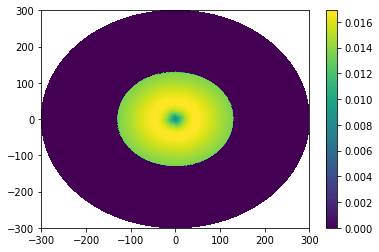

In [68]:
plot_2d_map(u)
plot_2d_map(u1)
plot_2d_map(u2)
plot_2d_map(u3)

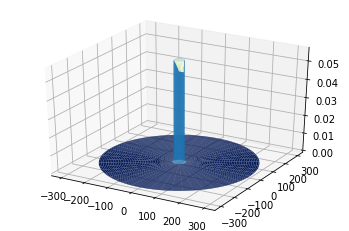

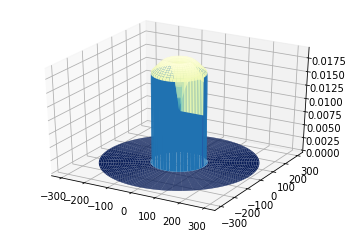

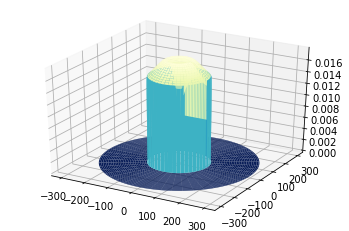

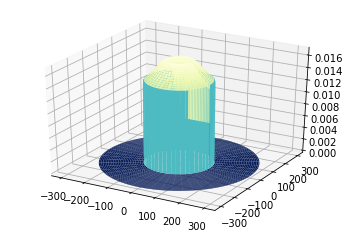

In [69]:
plot_3d(u)
plot_3d(u1)
plot_3d(u2)
plot_3d(u3)